<a href="https://colab.research.google.com/github/chirag20019/ML_Programs/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd

# Load dataset
file_path = '/content/Adaniports.csv'  # Replace with the path to your uploaded file in Colab
data = pd.read_csv(file_path)

# Basic information about the dataset
print("Dataset Info:")
print(data.info())

print("\nDataset Head:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe(include='all'))

print("\nMissing Values:")
print(data.isnull().sum())

# Check for unique values in categorical columns (if any)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memor

In [ ]:
from sklearn.impute import SimpleImputer

# Create target variable (1: Close > Open, 0: Close <= Open)
data['Target'] = (data['Close'] > data['Open']).astype(int)

# Handle missing values in 'Trades' column using mean imputation
imputer = SimpleImputer(strategy='mean')
data['Trades'] = imputer.fit_transform(data[['Trades']])

# Drop unnecessary columns
features = data.drop(columns=['Date', 'Symbol', 'Series', 'Target'])  # Adjust as needed
target = data['Target']

# Display preprocessed data
print("\nFeatures after preprocessing:")
print(features.head())

print("\nTarget variable distribution:")
print(target.value_counts())



Features after preprocessing:
   Prev Close    Open     High    Low   Last   Close    VWAP    Volume  \
0      440.00  770.00  1050.00  770.0  959.0  962.90  984.72  27294366   
1      962.90  984.00   990.00  874.0  885.0  893.90  941.38   4581338   
2      893.90  909.00   914.75  841.0  887.0  884.20  888.09   5124121   
3      884.20  890.00   958.00  890.0  929.0  921.55  929.17   4609762   
4      921.55  939.75   995.00  922.0  980.0  969.30  965.65   2977470   

       Turnover        Trades  Deliverable Volume  %Deliverble  
0  2.687719e+15  44922.588355             9859619       0.3612  
1  4.312765e+14  44922.588355             1453278       0.3172  
2  4.550658e+14  44922.588355             1069678       0.2088  
3  4.283257e+14  44922.588355             1260913       0.2735  
4  2.875200e+14  44922.588355              816123       0.2741  

Target variable distribution:
Target
0    1801
1    1521
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (2657, 12)
Testing set size: (665, 12)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

print("\nDecision Tree Classifier trained successfully.")



Decision Tree Classifier trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       361
           1       0.69      0.68      0.69       304

    accuracy                           0.71       665
   macro avg       0.71      0.71      0.71       665
weighted avg       0.71      0.71      0.71       665


Confusion Matrix:
[[268  93]
 [ 97 207]]


In [ ]:
# Classification report includes Precision, Recall, and F1-Score
print("\nAnalysis of Precision, Recall, and F1-Score is already included in the classification report above.")



Analysis of Precision, Recall, and F1-Score is already included in the classification report above.


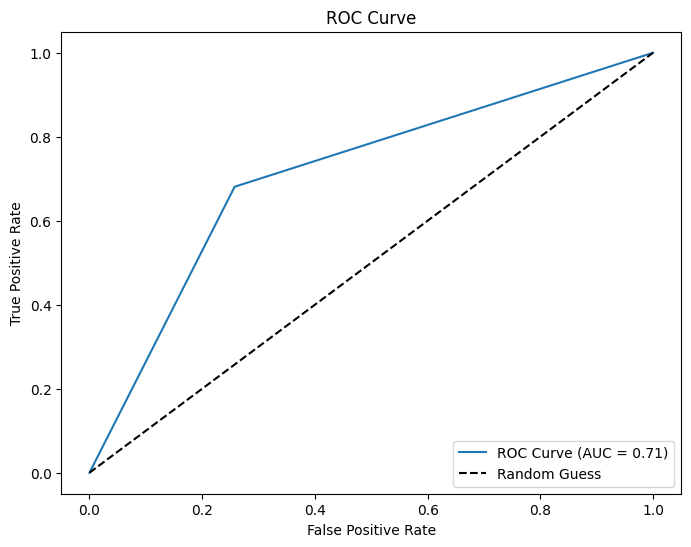

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


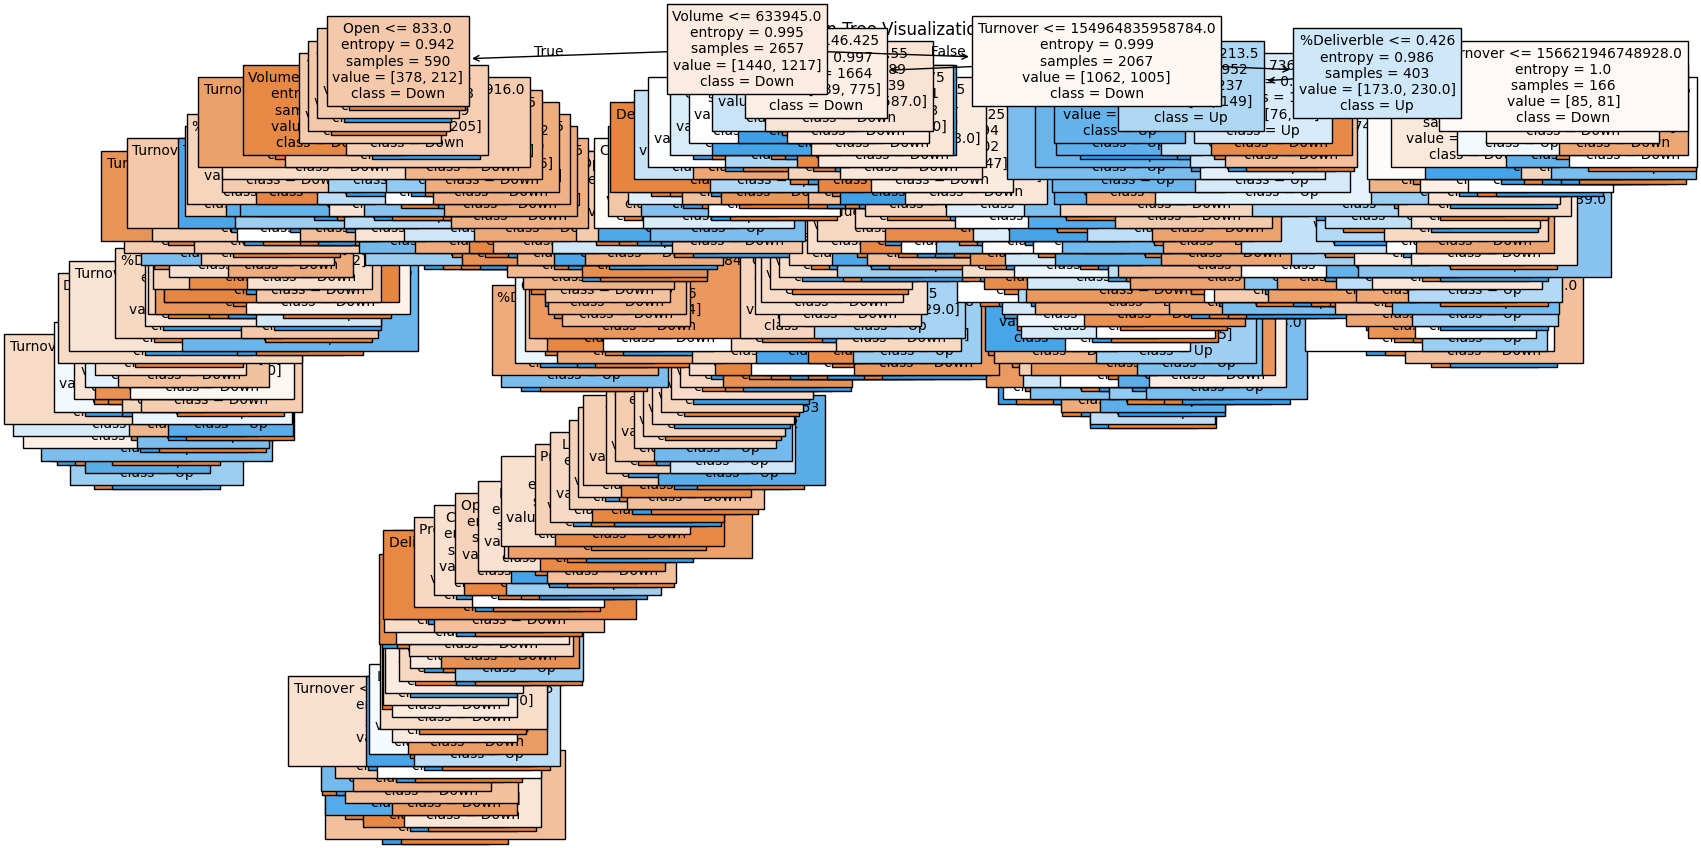

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=["Down", "Up"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
print("Results Summary:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

print("\nConclusion:")
print("The Decision Tree classifier performs with moderate accuracy and provides reasonable precision and recall.")
print("Further optimization (e.g., hyperparameter tuning) may improve results.")


Results Summary:
Accuracy: 0.71
ROC AUC: 0.71

Conclusion:
The Decision Tree classifier performs with moderate accuracy and provides reasonable precision and recall.
Further optimization (e.g., hyperparameter tuning) may improve results.
